In [1]:
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

# Import module

In [2]:
from context import CL61_module as mCL61

# Open datasets

In [ ]:
from pathlib import Path
# Get data folder
#ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
start_data = '2023-03-16 00:00:00'
end_data = '2023-03-18 00:00:00'

march = mCL61.CL61Processor(folder_path=ceil_path, start_datetime=start_data, end_datetime=end_data)
# to open 2days of data it takes : 1m10s

In [3]:
# Or from a specific netcdf file (quicker) 
februar = mCL61.CL61Processor(folder_path='../Data', specific_filename='temp_20230204.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


# Plot basic colormesh of raw data

In [ ]:
march.plot.visualize_data(plot_type='colormesh', range_limits= [0,15000])

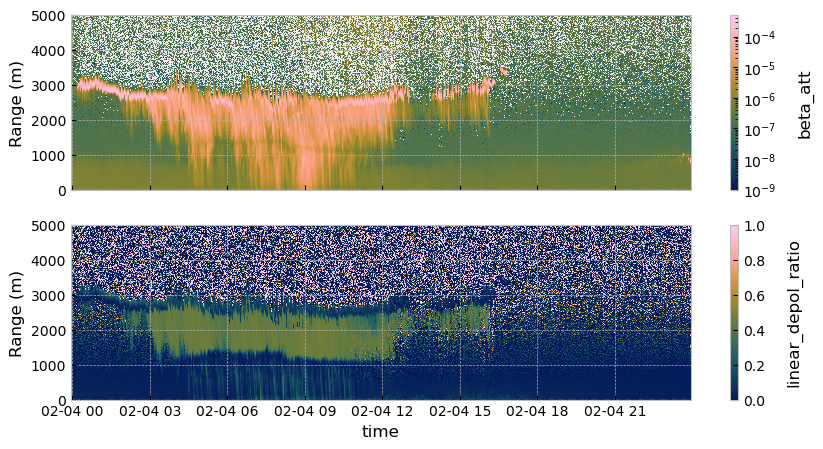

In [4]:
februar.plot.visualize_data(plot_type='colormesh')

# Filter out noisy part

In [ ]:
march.process.mask_noise()

In [4]:
februar.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


In [ ]:
march.plot.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,2000])

In [ ]:
februar.plot.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,5000])

In [ ]:
march.plot.vertical_profiles(time_of_interest="2023-03-16 00:00:00",
                             var_names=['x_pol', 'p_pol', 'range'],
                             label_first_profile='x polarisation',
                             label_second_profile= 'p polarisation',
                             variables_limits=[[1e-9, 1e-5],[1e-9,1e-5]],
                             range_limits==[10000,12000],
                             x_scales=['lin', 'lin'])

In [ ]:
march.plot.compare_profiles(comparison='variable',
                            time_period="2023-03-16 00:00:00",
                            hlims=[10000,12000])

# Classify

## K-mean classificitaiton

In [5]:
march.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_number = 8,
                                        plot_result = True,
                                        kmean_method = 'random')

NameError: name 'march' is not defined

In [ ]:
march.process.classify_clusters()

In [ ]:

march.plot.plot_classes_colormesh()

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


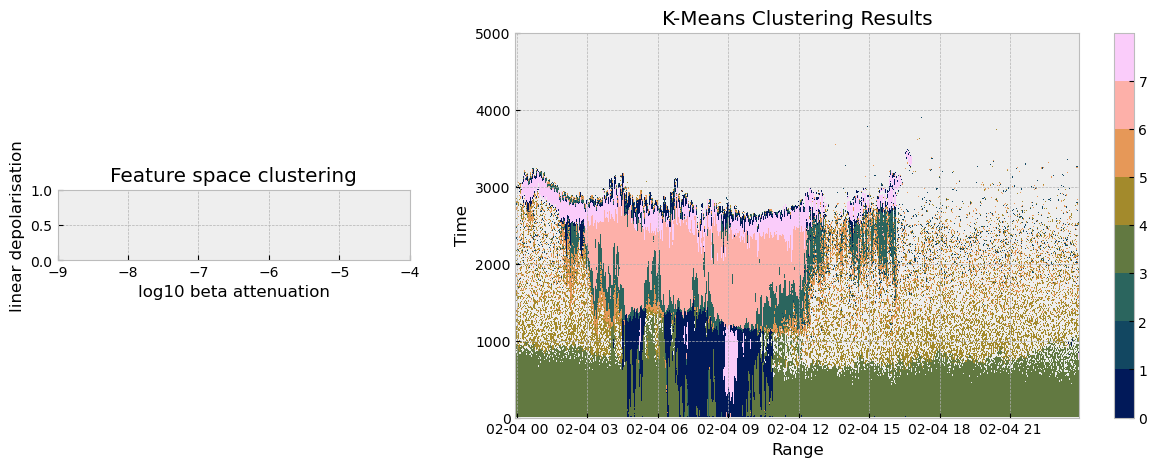

saving results under followingkmean_clusters


In [6]:
februar.process.perform_kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                          weights=[1,1, 0.3],
                                          cluster_number=8,
                                          plot_result=True,
                                          kmean_method  = 'random')